In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split
from sklearn.grid_search import GridSearchCV


In [21]:
train_msq = pd.read_csv('/Users/nichollejames/Desktop/mosquitos/kaggle_competition/clean_data/train_msq.csv')

In [22]:
train_msq.columns.tolist()

['Unnamed: 0',
 'Trap',
 'Date',
 'Species',
 'TotalMosquitos',
 'Address',
 'Block',
 'Street',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'NumMosquitos',
 'WnvPresent',
 'dist_to_spray',
 'dist_to_ord',
 'dist_to_mdw',
 'station_name',
 'Station',
 'Tmax',
 'Tmin',
 'Tavg',
 'WetBulb',
 'PrecipTotal',
 'ResultSpeed',
 'AvgSpeed']

In [23]:
import imp
plotter = imp.load_source('plotter', '/Users/nichollejames/Desktop/DSI-SF-2-oboechick/week-04/plotting/knn_plotter.py')
from plotter import KNNBoundaryPlotter

In [37]:
train_msq.corr()

,Unnamed: 0,TotalMosquitos,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,dist_to_spray,dist_to_ord,dist_to_mdw,Station,Tmax,Tmin,Tavg,WetBulb,PrecipTotal,ResultSpeed,AvgSpeed
Unnamed: 0,1.000000,0.064123,-0.075375,-0.269734,0.163840,-0.293780,0.038228,-0.011267,0.225163,0.249257,0.075511,0.152102,-0.024049,0.006406,-0.011248,-0.025862,-0.047997,0.027858,0.018731
TotalMosquitos,0.064123,1.000000,-0.075255,-0.059085,-0.001649,-0.092381,0.405804,0.055560,0.113958,0.035746,0.066979,-0.012511,0.054795,0.064098,0.062812,0.061401,-0.004496,-0.006327,-0.000104
Block,-0.075375,-0.075255,1.000000,0.089427,-0.190142,0.173786,0.001985,0.037100,0.068967,-0.121988,-0.001350,-0.294010,0.027102,-0.002683,0.013747,0.027731,0.049359,-0.008821,-0.011739
Latitude,-0.269734,-0.059085,0.089427,1.000000,-0.636393,0.326204,-0.050559,0.045720,-0.559910,-0.925625,0.492132,-0.748935,-0.020913,-0.115107,-0.069281,-0.025173,0.102520,0.004720,-0.018920
Longitude,0.163840,-0.001649,-0.190142,-0.636393,1.000000,-0.370554,-0.053131,-0.073199,0.282355,0.868549,-0.087958,0.639094,0.049637,0.125382,0.090874,0.053566,-0.069015,0.013421,0.038248
AddressAccuracy,-0.293780,-0.092381,0.173786,0.326204,-0.370554,1.000000,-0.047644,0.025590,-0.266432,-0.374493,-0.105390,-0.189960,-0.013100,-0.044099,-0.029442,-0.012254,0.034484,-0.026800,-0.033443
NumMosquitos,0.038228,0.405804,0.001985,-0.050559,-0.053131,-0.047644,1.000000,0.228447,0.098939,0.008845,0.050929,-0.044371,0.090340,0.097279,0.099871,0.095301,0.010673,0.019513,0.026346
WnvPresent,-0.011267,0.055560,0.037100,0.045720,-0.073199,0.025590,0.228447,1.000000,-0.075315,-0.062938,0.026974,-0.065765,0.041011,0.064859,0.056063,0.072407,0.013806,-0.050981,-0.037695
dist_to_spray,0.225163,0.113958,0.068967,-0.559910,0.282355,-0.266432,0.098939,-0.075315,1.000000,0.501655,-0.088350,0.257966,-0.072466,-0.079692,-0.089688,-0.298346,-0.287081,0.208023,0.091633
dist_to_ord,0.249257,0.035746,-0.121988,-0.925625,0.868549,-0.374493,0.008845,-0.062938,0.501655,1.000000,-0.322641,0.748754,0.037299,0.128948,0.085554,0.040573,-0.092600,0.004204,0.031014


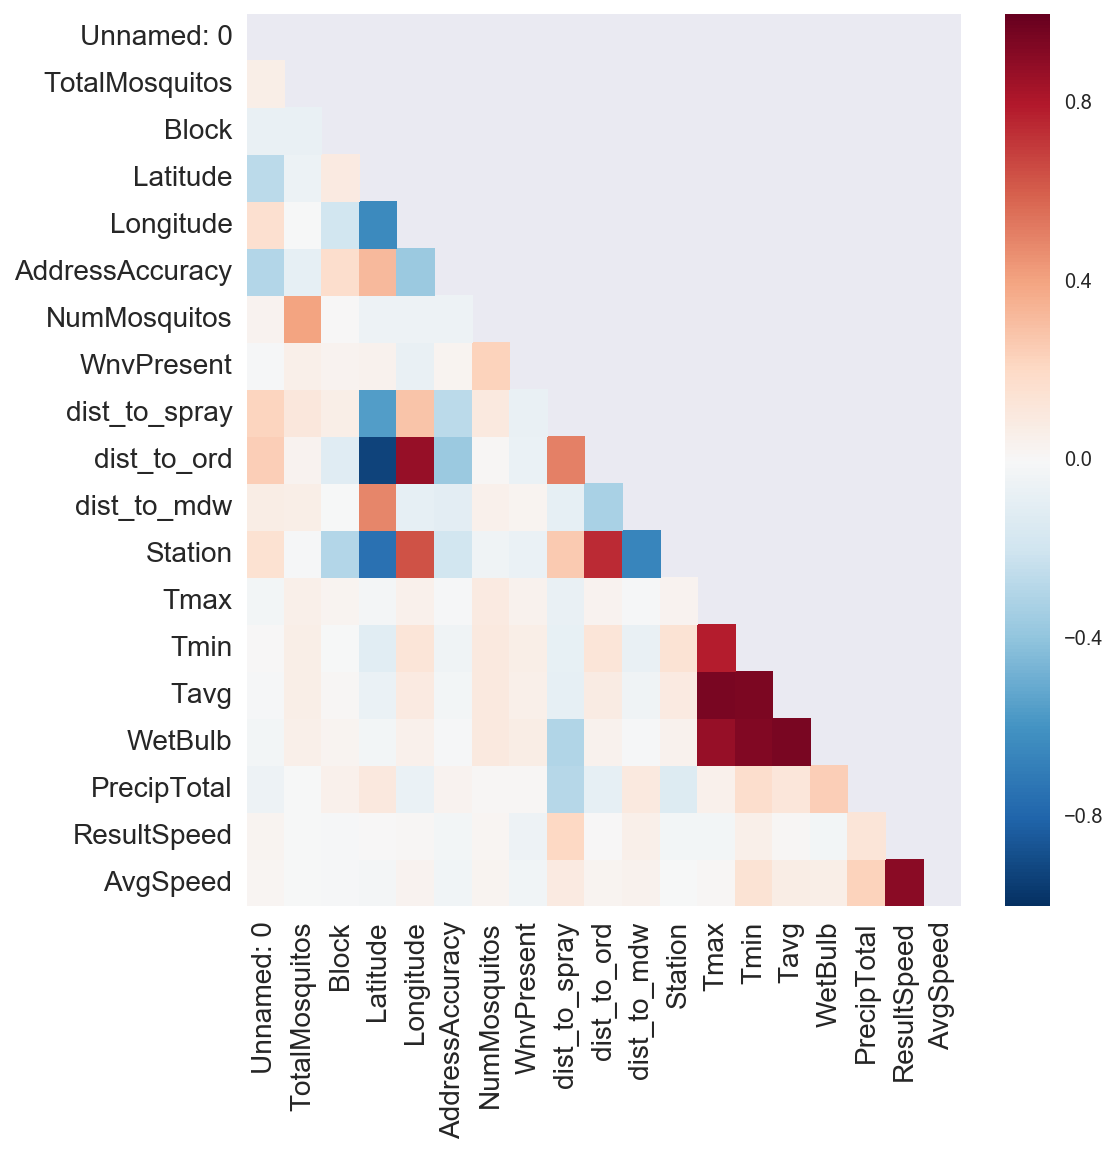

In [38]:
corrs = train_msq.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(8,8))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [97]:
y = train_msq.Species
X = train_msq[[col for col in train_msq.columns if col in ['WnvPresent'
                                                             'TotalMosquitos',
#                                                              'Latitude',
#                                                              'Longitude',
#                                                              'NumMosquitos',
#                                                              'dist_to_spray',
#                                                              'dist_to_ord',
#                                                              'dist_to_mdw',
                                                             'Station',
#                                                              'Tmax',
#                                                              'Tmin',
#                                                              'Tavg',
                                                             'WetBulb',
#                                                              'PrecipTotal',
#                                                              'ResultSpeed',
#                                                              'AvgSpeed'
                                                          ]]]

print X.shape, X.dtypes
print y.shape, y.dtypes
X.describe()

(8443, 8) Latitude         float64
Longitude        float64
NumMosquitos       int64
dist_to_spray    float64
dist_to_ord      float64
dist_to_mdw      float64
Station            int64
WetBulb            int64
dtype: object
(8443,) object


,Latitude,Longitude,NumMosquitos,dist_to_spray,dist_to_ord,dist_to_mdw,Station,WetBulb
count,8443.000000,8443.000000,8443.000000,684.000000,8443.000000,8443.000000,8443.000000,8443.000000
mean,41.844126,-87.694510,8.363496,6.383135,16.797038,9.060274,1.712069,64.400095
std,0.106495,0.084033,11.191752,4.812408,7.092177,3.959758,0.452826,6.832449
min,41.644612,-87.930995,1.000000,0.002010,2.569594,0.532047,1.000000,46.000000
25%,41.750498,-87.750938,1.000000,NaN,11.058664,6.431495,1.000000,60.000000
50%,41.857402,-87.694991,4.000000,NaN,16.300440,8.955517,2.000000,65.000000
75%,41.944869,-87.642984,10.000000,NaN,23.289075,11.913475,2.000000,70.000000
max,42.017430,-87.531635,50.000000,21.401391,30.849195,16.312220,2.000000,76.000000


In [98]:
X.head()

,Latitude,Longitude,NumMosquitos,dist_to_spray,dist_to_ord,dist_to_mdw,Station,WetBulb
0,41.953705,-87.733974,1,NaN,10.63904,11.61165,1,72
1,41.953705,-87.733974,1,NaN,10.63904,11.61165,1,59
2,41.953705,-87.733974,1,NaN,10.63904,11.61165,1,71
3,41.953705,-87.733974,1,NaN,10.63904,11.61165,1,69
4,41.953705,-87.733974,1,NaN,10.63904,11.61165,1,69


In [99]:
knn_uniform_n3 = KNeighborsClassifier(n_neighbors = 50, weights = 'uniform')
# knn_uniform_n3.fit(X,np.ravel(y))

In [100]:
from sklearn.metrics import accuracy_score

def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in stratified_k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = KNeighborsClassifier(n_neighbors = 50, weights = 'uniform')
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

y_pred = stratified_cv(X.values, y, knn_uniform_n3, shuffle=True, n_folds=10)
accuracy_score(y, y_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [6]:
train_msq.columns.tolist()

['Unnamed: 0',
 'Trap',
 'Date',
 'Species',
 'TotalMosquitos',
 'Address',
 'Block',
 'Street',
 'AddressNumberAndStreet',
 'Latitude',
 'Longitude',
 'AddressAccuracy',
 'NumMosquitos',
 'WnvPresent',
 'dist_to_spray',
 'dist_to_ord',
 'dist_to_mdw',
 'station_name',
 'Station',
 'Tmax',
 'Tmin',
 'Tavg',
 'WetBulb',
 'PrecipTotal',
 'ResultSpeed',
 'AvgSpeed']

In [7]:
train_msq.groupby(['Trap','Date'])['NumMosquitos_x'].sum().reset_index().head()

KeyError: 'Column not found: NumMosquitos_x'

In [ ]:
train_msq.groupby(['Trap','Date'])['NumMosquitos_y'].sum().reset_index().head()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X,y)